# What is Time Series Analysis

A time series is a sequence of data points that occur in successive order over some period of time

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
df = pd.read_csv('/content/Nifty 50 June 2020 - June 2021.csv',parse_dates=['Date'],index_col='Date')

In [47]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-29,10311.950195,10337.950195,10223.599609,10312.400391,10312.400391,574500.0
2020-06-30,10382.599609,10401.049805,10267.349609,10302.099609,10302.099609,556200.0
2020-07-01,10323.799805,10447.049805,10299.599609,10430.049805,10430.049805,573600.0
2020-07-02,10493.049805,10598.200195,10485.549805,10551.700195,10551.700195,597400.0
2020-07-03,10614.950195,10631.299805,10562.650391,10607.349609,10607.349609,525200.0


In [48]:
df.index

DatetimeIndex(['2020-06-29', '2020-06-30', '2020-07-01', '2020-07-02',
               '2020-07-03', '2020-07-06', '2020-07-07', '2020-07-08',
               '2020-07-09', '2020-07-10',
               ...
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

# Missing Values

In [49]:
df.isna().sum()

Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

In [50]:
df = df.fillna(method='ffill')

In [51]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,13335.301198,13403.553575,13230.096018,13324.193212,13324.193212,5.737422e+05
std,1701.312583,1708.156768,1688.575201,1700.947270,1700.947270,1.701723e+05
min,10311.950195,10337.950195,10223.599609,10302.099609,10302.099609,0.000000e+00
25%,11538.925293,11581.074707,11449.199707,11518.949707,11518.949707,4.900000e+05
50%,13741.900391,13773.250000,13626.900391,13740.700195,13740.700195,5.718000e+05
75%,14814.349609,14895.125000,14693.700195,14829.000000,14829.000000,6.623500e+05
max,15915.349609,15915.650391,15842.400391,15869.250000,15869.250000,1.371800e+06


# Working with Date Time Index

**Partial Date Index**

In [52]:
df['2021-01'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,13970.000000,14024.849609,13936.450195,13981.750000,13981.750000,452400.0
2021-01-04,14104.349609,14147.950195,13953.750000,14132.900391,14132.900391,495000.0
2021-01-05,14075.150391,14215.599609,14048.150391,14199.500000,14199.500000,492500.0
2021-01-06,14240.950195,14244.150391,14039.900391,14146.250000,14146.250000,632300.0
2021-01-07,14253.750000,14256.250000,14123.099609,14137.349609,14137.349609,559200.0


**Specified Data Range**

In [53]:
df['2021-01':'2021-02']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,13970.000000,14024.849609,13936.450195,13981.750000,13981.750000,452400.0
2021-01-04,14104.349609,14147.950195,13953.750000,14132.900391,14132.900391,495000.0
2021-01-05,14075.150391,14215.599609,14048.150391,14199.500000,14199.500000,492500.0
2021-01-06,14240.950195,14244.150391,14039.900391,14146.250000,14146.250000,632300.0
2021-01-07,14253.750000,14256.250000,14123.099609,14137.349609,14137.349609,559200.0
2021-01-08,14258.400391,14367.299805,14221.650391,14347.250000,14347.250000,613500.0
2021-01-11,14474.049805,14498.200195,14383.099609,14484.750000,14484.750000,672900.0
2021-01-12,14473.799805,14590.650391,14432.849609,14563.450195,14563.450195,929600.0
2021-01-13,14639.799805,14653.349609,14435.700195,14564.849609,14564.849609,874000.0


In [54]:
df['2021-08':'2021-09'].Close.mean()

nan

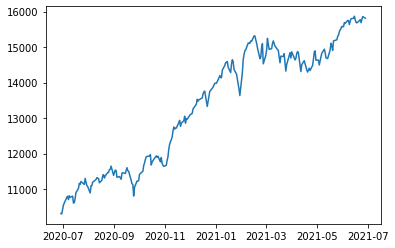

In [55]:
plt.plot(df['Close'])
plt.rcParams["figure.figsize"] = (10,5)

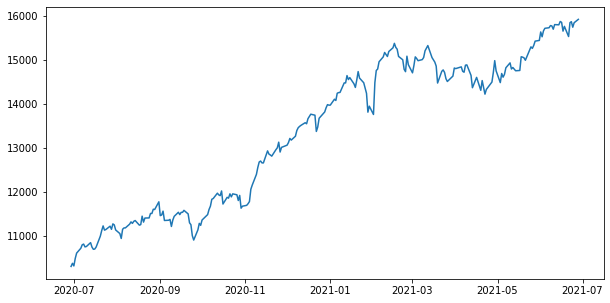

In [56]:
plt.plot(df['Open'])
plt.rcParams["figure.figsize"] = (10,5)

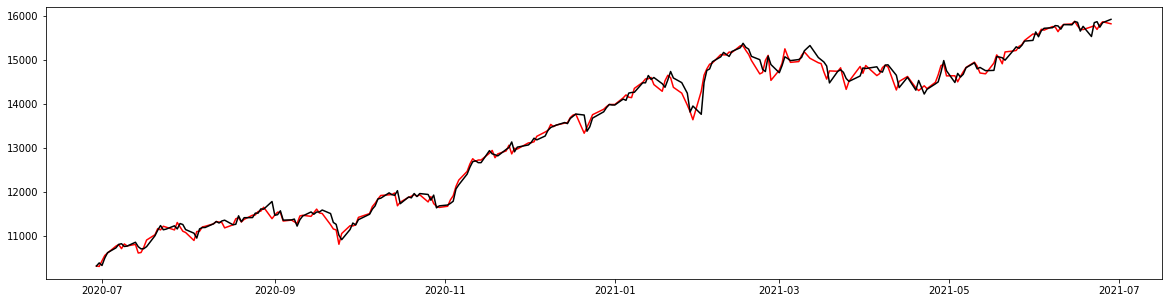

In [84]:
plt.plot(df['Close'],color='red')
plt.plot(df['Open'],color='black')

# Resample

* resample() function is primarily used for time series data

* resample() is a method of pandas dataframes that can be used to summarize data by date or time

**Monthly Resampled Data**

In [57]:
df['Close'].resample('M').mean()

Date
2020-06-30    10307.250000
2020-07-31    10897.695695
2020-08-31    11318.566685
2020-09-30    11336.702193
2020-10-31    11789.709496
2020-11-30    12599.307568
2020-12-31    13550.440874
2021-01-31    14282.764990
2021-02-28    14956.842529
2021-03-31    14835.099981
2021-04-30    14613.852539
2021-05-31    14983.525000
2021-06-30    15733.547412
Freq: M, Name: Close, dtype: float64

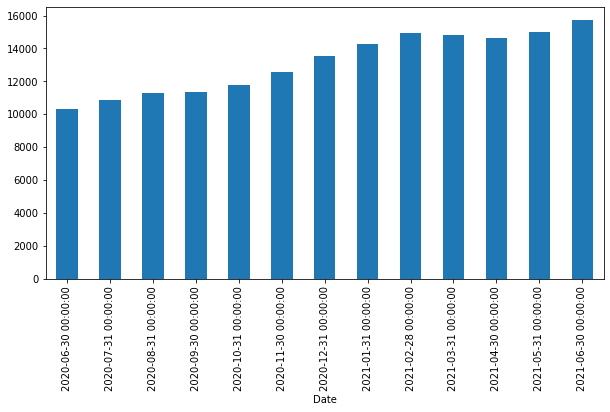

In [58]:
df['Close'].resample('M').mean().plot(kind='bar')

**Weekly Resampled Data**

In [59]:
df['Open'].resample('W').mean().head()

Date
2020-07-05    10425.269922
2020-07-12    10772.999805
2020-07-19    10752.379883
2020-07-26    11128.340039
2020-08-02    11209.959961
Freq: W-SUN, Name: Open, dtype: float64

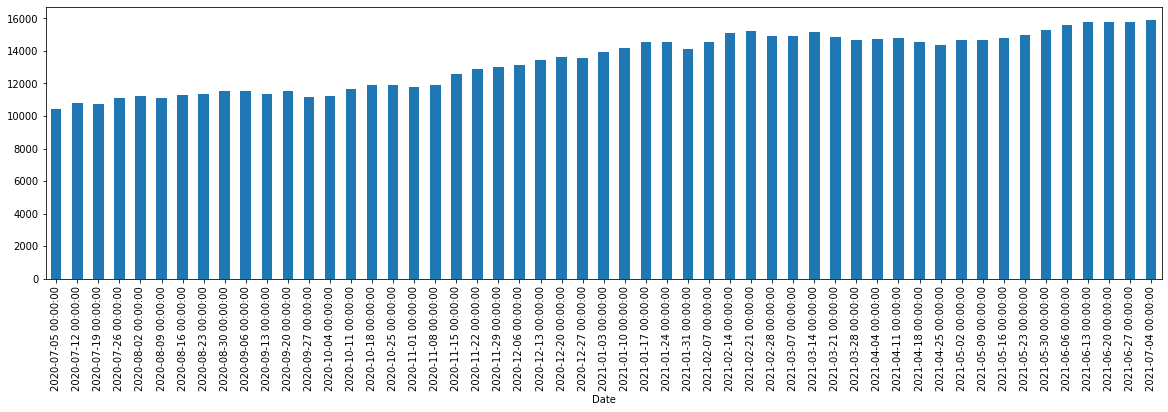

In [61]:
df['Open'].resample('W').mean().plot(kind='bar')
plt.rcParams["figure.figsize"] = (20,5)